# Data collection

In [1]:
import numpy as np
import pandas as pd
import re

In [2]:
# get data
df = pd.read_csv('data/public_train.csv')
df.head()

,id,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label
0,1,389c669730cb6c54314a46be785cea42,"THĂNG CẤP BẬC HÀM ĐỐI VỚI 2 CÁN BỘ, CHIẾN SỸ H...",1585945439,19477,378,173.0,0
1,2,775baa6d037b6d359b229a656eaeaf08,<URL>,1588939166.0,11,5,3,0
2,3,b9f3394d2aff86d85974f5040c401f08,TƯ VẤN MÙA THI: Cách nộp hồ sơ để trúng tuyển ...,1591405213,48,5,19.0,0
3,4,808e278b22ec6b96f2faf7447d10cd8e,Cơ quan Cạnh tranh và Thị trường Anh quyết địn...,1592023613,3,0,0.0,0
4,5,f81bdd6d8be4c5f64bb664214e47aced,Thêm 7 ca tại Quảng Nam liên quan đến hành khá...,1583737358,775,0,54.0,0


In [3]:
# check null value in data
df.isnull().sum()

id                    0
user_name             0
post_message          1
timestamp_post       96
num_like_post       115
num_comment_post     10
num_share_post      725
label                 0
dtype: int64

In [4]:
# check duplicate data
df[df.duplicated('post_message')]

,id,user_name,post_message,timestamp_post,num_like_post,num_comment_post,num_share_post,label
150,151,dd35242704071b7ddf90a8ee90055ec4,<URL>,1588947622.0,87,4,1,0
175,176,79c2d500763b7f14f2631a8ab6a71ea4,<URL>,1588917759.0,NaN,0,NaN,0
178,179,59fb67d9b2bd2b380529562035b3bab4,<URL>,1587632107.0,3,2,NaN,0
197,198,ae7c1d8434b0629a83958eac387e7424,Cơ hội có 1-0-2 để cùng nhau xây dựng những cô...,1584262049,2898,50,142.0,0
454,455,654d291ef3011072e7980e89293fbdac,<URL>,1592663724.0,4,0,NaN,0
...,...,...,...,...,...,...,...,...
4069,4070,849a708a4631a8152557798796b3e09c,<URL>,1591778650.0,3,0,1,0
4108,4109,40bca5be47ef18a26ce6ec19650e6b69,<URL>,1591921753.0,8,0,NaN,0
4247,4248,abd4d580d75bbfce0d52e0b963e035aa,[<URL>](<URL>),1587138493.0,58,9,2,0
4274,4275,bb1247add19beb5eb972410460a0469c,<URL>,1592462355.0,19,3,2,0


In [5]:
pd.Timestamp(0000000000)

Timestamp('1970-01-01 00:00:00')

In [6]:
# convert unknown record to 0 value
df.iloc[:, 4:7] = df.iloc[:, 4:7].replace('unknown', 0)

# cast from Dtype object to int64 
for i in range(3, 7):
  df.iloc[:, i] = pd.to_numeric(df.iloc[:, i], errors='coerce', downcast='integer')
  
# convert timestamp to date format
df['timestamp_post'] = pd.to_datetime(df['timestamp_post'], unit='s', errors='coerce')

In [7]:
# remove null, duplicate text content record and change dtype of num_like, comment, share feature to int64
df = df.dropna(subset=['post_message'])
df['timestamp_post'] = df['timestamp_post'].fillna(pd.Timestamp(0000000000)) # empty timestamp
df = df.fillna(0)
df = df.drop_duplicates(subset='post_message', keep='first')
df.iloc[:, 4:7] = df.iloc[:, 4:7].astype('int64')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4288 entries, 0 to 4371
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   id                4288 non-null   int64         
 1   user_name         4288 non-null   object        
 2   post_message      4288 non-null   object        
 3   timestamp_post    4288 non-null   datetime64[ns]
 4   num_like_post     4288 non-null   int64         
 5   num_comment_post  4288 non-null   int64         
 6   num_share_post    4288 non-null   int64         
 7   label             4288 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 301.5+ KB


# Visualization

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
# run this again if iplot doesn't display
import plotly
import cufflinks as cf
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
cf.go_offline()

Số lượng tin trong dữ liệu: 4288 

label
0    3567
1     721
dtype: int64 



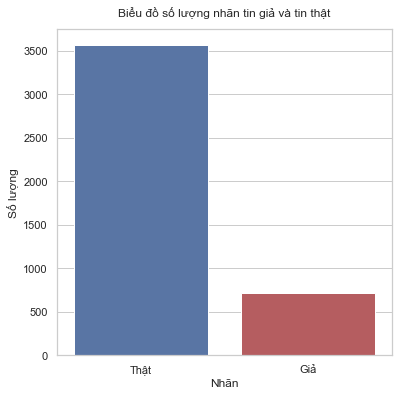

In [10]:
# Count of each label
label_count = df.value_counts('label')

sns.set_theme(style="whitegrid")
plt.figure(figsize=(6, 6))
sns.barplot(x=['Thật', 'Giả'], y=label_count, palette=['b', 'r'])
plt.xlabel('Nhãn')
plt.ylabel('Số lượng')
plt.title('Biểu đồ số lượng nhãn tin giả và tin thật', y=1.02) # y = space from graph
print('Số lượng tin trong dữ liệu:', len(df['label']), '\n')
print(label_count, '\n')

Text(0.5, 1.0, 'Biểu đồ số lượng từ trong tin thật và giả')

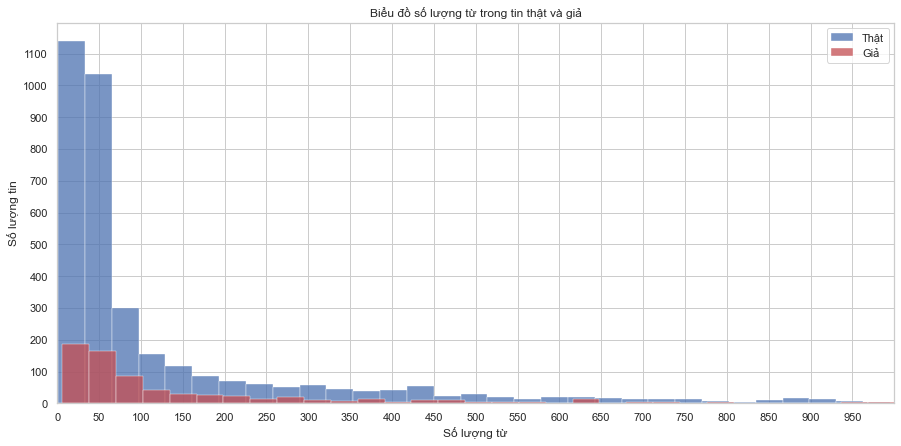

In [11]:
# for graphing
len_true = [len(n.split()) for n in df[df['label'] == 0]['post_message']]
len_fake = [len(n.split()) for n in df[df['label'] == 1]['post_message']]

# Number of words distribution in fake and true news
plt.figure(figsize=(15, 7))
sns.histplot(data=len_true, bins=200, color='b')
sns.histplot(data=len_fake, bins=100, color='r')
plt.xticks(ticks=range(0, 1000, 50))
plt.yticks(ticks=range(0, 1200, 100))
plt.xlim(0,1000)
plt.xlabel('Số lượng từ')
plt.ylabel('Số lượng tin')
plt.legend(labels=["Thật", "Giả"])
plt.title('Biểu đồ số lượng từ trong tin thật và giả')

Text(0.5, 1.0, 'Biểu đồ số lượng like trong tin thật và giả')

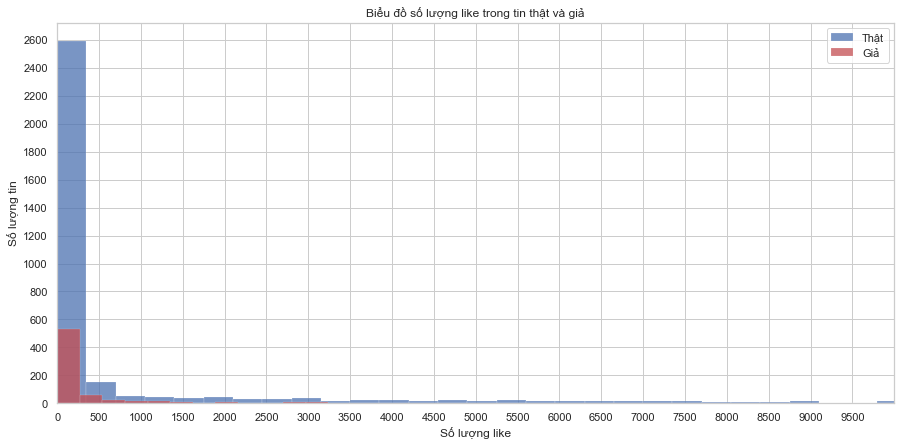

In [87]:
like_true =[n for n in df[df['label'] == 0]['num_like_post'] if n<1000000000]
like_fake = df[df['label'] == 1]['num_like_post']

# print(like_true)

plt.figure(figsize=(15, 7))
sns.histplot(data=like_true, bins=400, color='b')
sns.histplot(data=like_fake, bins=200, color='r')
plt.xticks(ticks=range(0, 10000, 500))
plt.yticks(ticks=range(0, 2700, 200))
plt.xlim(0,10000)
plt.xlabel('Số lượng like')
plt.ylabel('Số lượng tin')
plt.legend(labels=["Thật", "Giả"])
plt.title('Biểu đồ số lượng like trong tin thật và giả')

Text(0.5, 1.0, 'Biểu đồ giờ được đăng của tin thật và giả')

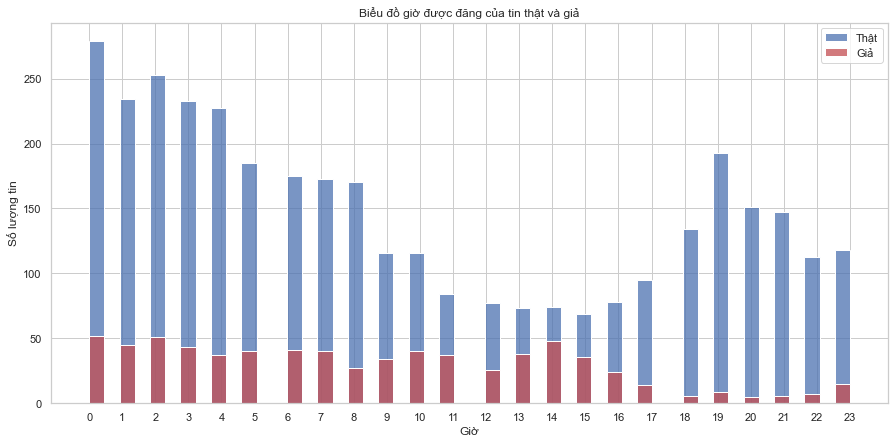

In [13]:
# for graphing
time_true = [n.hour for n in df[df['label'] == 0]['timestamp_post']]
time_fake = [n.hour for n in df[df['label'] == 1]['timestamp_post']]

plt.figure(figsize=(15, 7))
sns.histplot(data=time_true, bins=50, color='b')
sns.histplot(data=time_fake, bins=50, color='r')
plt.xticks(ticks=range(0, 24))
plt.xlabel('Giờ')
plt.ylabel('Số lượng tin')
plt.legend(labels=["Thật", "Giả"])
plt.title('Biểu đồ giờ được đăng của tin thật và giả')

In [40]:
from underthesea import word_tokenize
import itertools
import string

In [14]:
# get stopwords list
f = open('data/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords = f.read().split('\n')

In [41]:
def clean_stopwords(text_list):
  ''' sent_list: already tokenized text in list type
  '''
  clean_text = []
  for word in text_list:
    if word not in stopwords:
      clean_text.append(word.lower())
  return clean_text

In [42]:
def normalize(text):
  text = re.sub(r'[^\w\s]', '', text) # clean normal punctuation
  text = re.sub(r'_', '', text) # clean weird underscore in text (_like this)
  text = re.sub(r'http\w+', '', text) # clean url link text
  text = word_tokenize(text.lower()) #tokenize, word segment
  return clean_stopwords(text)

In [45]:
true_news = [normalize(n) for n in df[df['label'] == 0]['post_message']]
fake_news = [normalize(n) for n in df[df['label'] == 1]['post_message']]

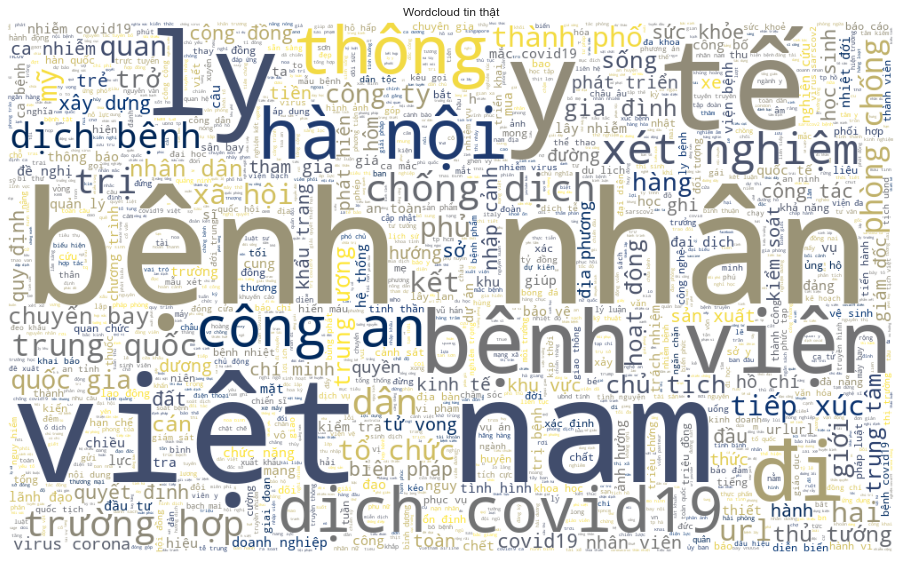

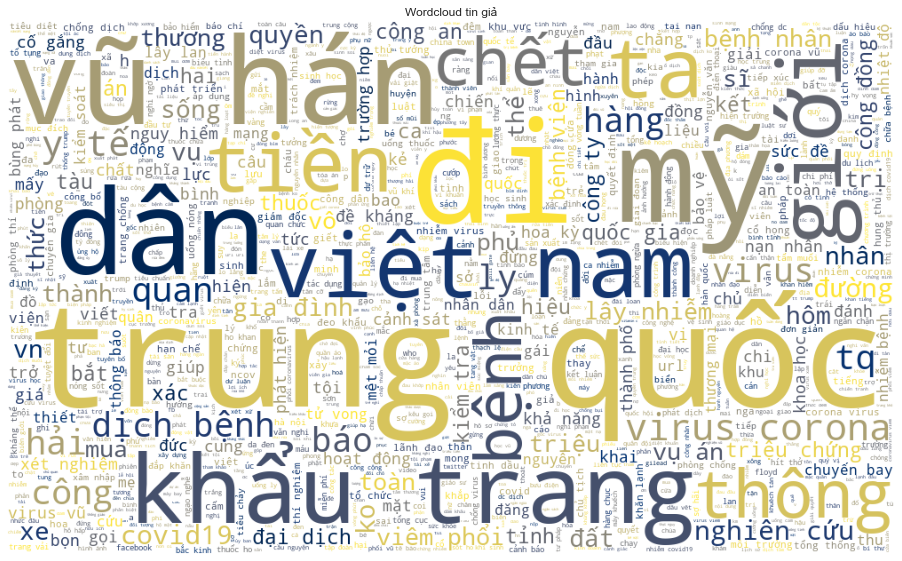

In [46]:
from wordcloud import WordCloud, ImageColorGenerator

# True news
true_news_flatten = list(itertools.chain(*true_news))

plt.figure(figsize = (35, 35))
wc1 = WordCloud(background_color='white', colormap='cividis_r', max_words = 2000, width = 1000, height = 600, stopwords = stopwords).generate(" ".join(true_news_flatten))
plt.subplot(1, 2, 1)
plt.title('Wordcloud tin thật')
plt.axis("off")
plt.imshow(wc1)

# Fake news
fake_news_flatten = list(itertools.chain(*fake_news))
plt.figure(figsize = (35, 35))
wc0 = WordCloud(background_color='white', colormap='cividis', max_words = 2000, width = 1000, height = 600, stopwords = stopwords).generate(" ".join(fake_news_flatten))
plt.subplot(1, 2, 2)
plt.title('Wordcloud tin giả')
plt.axis("off")
plt.imshow(wc0)

# TF-IDF features

In [15]:
from sklearn.feature_extraction.text import TfidfVectorizer
from underthesea import word_tokenize
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import MinMaxScaler
import time
import string

In [16]:
def tokenize(text):
  #text = text.translate(str.maketrans('', '', string.punctuation)) # clean punctuation
  text = word_tokenize(text.lower()) #tokenize, word segment
  return text

In [17]:
start = time.time()

# get tfidf vectors with n_grams = 3
vectorizer = TfidfVectorizer(tokenizer=tokenize, ngram_range=(1, 3))
X_tfidf = vectorizer.fit_transform(df['post_message'])

end = time.time()
print(end - start)

70.0074999332428


In [18]:
start = time.time()

# reduce dimensionality of tfidf vector to 100 dimensions
svd = TruncatedSVD(n_components=100, algorithm='arpack')
X_tfidf_svd = svd.fit_transform(X_tfidf)

end = time.time()
print(end - start)

6.60710334777832


In [19]:
# scale data to (0, 1) range as we've performed dimension reduction
scaler1 = MinMaxScaler()
X1 = scaler1.fit_transform(X_tfidf_svd)

# Custom features

In [20]:
def extract_feature(data):
  
  text = data[2] # get text content
  
  num_punct = len([k for k in word_tokenize(text) if k in string.punctuation])
  
  num_one, num_two, num_three_gtt, \
  num_numbers, num_stopwords, \
  num_upper, num_any_upper = ([] for i in range(7))
  
  tokens = word_tokenize(text)
  num_distinct = set()
  
  for token in tokens:
    
    if len(token.split()) == 1:
      num_one.append(token)
    elif len(token.split()) == 2:
      num_two.append(token)
    else:
      num_three_gtt.append(token)
      
    if token.isnumeric(): 
      num_numbers.append(token)

    if token in stopwords:
      num_stopwords.append(token)
      
    if token.isupper():
      num_upper.append(token)
      
    if any(char.isupper() for char in token): 
      num_any_upper.append(token)
      
    num_distinct.add(token.lower())
  
  features = [len(tokens), # number of total word tokens (without punctuation)
              len(text), # number of characters 
              num_punct, # number of punctuation
              len(num_one), # number of 1 word tokens
              len(num_two), # number of 2 words tokens
              len(num_three_gtt), # number of >=3 words tokens
              len(num_numbers), # number of token that is numeric
              len(num_stopwords), # number of token that is a stopword
              len(num_upper), # number of token that is in full CAPITAL
              len(num_any_upper), # number of token that contains any CAPITAL character
              len(num_distinct), # number of distinct tokens
              data[4], # number of likes on post
              data[5], # number of comments on post
              data[6], # number of shares
              data[3].hour,
              data[3].day_of_week,
              data[3].month,
              data[3].day
             ]
  return features

In [21]:
start = time.time()

# extract custom features, tokenize, clean stopwords, 
X_cf = np.array([extract_feature(df.iloc[i, :]) for i in range(df.shape[0])])

end = time.time()
print(end - start)

136.04792141914368


In [22]:
scaler2 = MinMaxScaler()
X2 = scaler2.fit_transform(X_cf)

# Combine 2 features

In [23]:
# combine tf-idf and custom features
X3 = []
for i in range(len(X1)):
  X3.append(np.append(X1[i], X2[i]))
X3 = np.array(X3)
X3.shape

(4288, 118)

# Data preparation

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
y = np.array(df['label'])

In [26]:
X_train1, X_test1, y_train, y_test = train_test_split(X1, y, test_size=0.2, random_state=42)
X_train2, X_test2, y_train, y_test = train_test_split(X2, y, test_size=0.2, random_state=42)
X_train3, X_test3, y_train, y_test = train_test_split(X3, y, test_size=0.2, random_state=42)

print('Tập train:', len(X_train1))
print('Tập test:', len(X_test1))

Tập train: 3430
Tập test: 858


# Models

In [27]:
from sklearn.metrics import classification_report, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm

In [28]:
def decision_tree(X_train, X_test, y_train):
  tree = DecisionTreeClassifier(random_state=0)
  tree.fit(X_train, y_train)
  y_pred_tree = tree.predict(X_test)
  return y_pred_tree

def logistic_regression(X_train, X_test, y_train):
  clf_lore = LogisticRegression(random_state=0, max_iter=10000)
  clf_lore.fit(X_train, y_train)
  y_pred_lore = clf_lore.predict(X_test)
  return y_pred_lore

def knn(X_train, X_test, y_train):
  neigh = KNeighborsClassifier(n_neighbors=3)
  neigh.fit(X_train, y_train)
  y_pred_neigh = neigh.predict(X_test)
  return y_pred_neigh

def naive_bayes(X_train, X_test, y_train):
  nb = GaussianNB()
  nb.fit(X_train, y_train)
  y_pred_nb = nb.predict(X_test)
  return y_pred_nb

def svc(X_train, X_test, y_train):
  clf_svc = svm.LinearSVC()#kernel='linear')
  clf_svc.fit(X_train, y_train)
  y_pred_svc = clf_svc.predict(X_test)
  return y_pred_svc

def random_forest(X_train, X_test, y_train):
  clf_rf = RandomForestClassifier(random_state=0)
  clf_rf.fit(X_train, y_train)
  y_pred_rf = clf_rf.predict(X_test)
  return y_pred_rf

In [29]:
# tfidf
pred_tree1 = decision_tree(X_train1, X_test1, y_train)
pred_lore1 = logistic_regression(X_train1, X_test1, y_train)
pred_knn1 = knn(X_train1, X_test1, y_train)
pred_nb1 = naive_bayes(X_train1, X_test1, y_train)
pred_svc1 = svc(X_train1, X_test1, y_train)
pred_rf1 = random_forest(X_train1, X_test1, y_train)

In [30]:
# custom features
pred_tree2 = decision_tree(X_train2, X_test2, y_train)
pred_lore2 = logistic_regression(X_train2, X_test2, y_train)
pred_knn2 = knn(X_train2, X_test2, y_train)
pred_nb2 = naive_bayes(X_train2, X_test2, y_train)
pred_svc2 = svc(X_train2, X_test2, y_train)
pred_rf2 = random_forest(X_train2, X_test2, y_train)

In [31]:
# combined features
pred_tree3 = decision_tree(X_train3, X_test3, y_train)
pred_lore3 = logistic_regression(X_train3, X_test3, y_train)
pred_knn3 = knn(X_train3, X_test3, y_train)
pred_nb3 = naive_bayes(X_train3, X_test3, y_train)
pred_svc3 = svc(X_train3, X_test3, y_train)
pred_rf3 = random_forest(X_train3, X_test3, y_train)

# Evaluation

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [33]:
def evaluate(pred, true):
  #print('-----------------------------------------------------')
  acc = accuracy_score(pred, true)
  print(classification_report(pred, true), 'Accuracy:', acc)
  auc = roc_auc_score(pred, true)
  print('AUC:', auc)
  print('-----------------------------------------------------')
  print()
  return acc, auc

In [34]:
# evaluation on tfidf features

print('Logistic Regression')
acc_lore1, auc_lore1 = evaluate(pred_lore1, y_test)

print('K-nearest-neighbor')
acc_knn1, auc_knn1 = evaluate(pred_knn1, y_test)

print('Gaussian Naive Bayes')
acc_nb1, auc_nb1 = evaluate(pred_nb1, y_test)

print('Support Vector Machines')
acc_svc1, auc_svc1 = evaluate(pred_svc1, y_test)

print('Decision Tree')
acc_tree1, auc_tree1 = evaluate(pred_tree1, y_test)

print('Random Forest')
acc_rf1, auc_rf1 = evaluate(pred_rf1, y_test)

Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       827
           1       0.16      0.84      0.28        31

    accuracy                           0.84       858
   macro avg       0.58      0.84      0.59       858
weighted avg       0.96      0.84      0.89       858
 Accuracy: 0.8403263403263403
AUC: 0.8395483090845264
-----------------------------------------------------

K-nearest-neighbor
              precision    recall  f1-score   support

           0       0.93      0.88      0.91       745
           1       0.42      0.59      0.49       113

    accuracy                           0.84       858
   macro avg       0.68      0.74      0.70       858
weighted avg       0.87      0.84      0.85       858
 Accuracy: 0.8403263403263403
AUC: 0.7353863514877947
-----------------------------------------------------

Gaussian Naive Bayes
              precision    recall  f1-score   support

           0   

In [35]:
# evaluation on custom features

print('Logistic Regression')
acc_lore2, auc_lore2 = evaluate(pred_lore2, y_test)

print('K-nearest-neighbor')
acc_knn2, auc_knn2 = evaluate(pred_knn2, y_test)

print('Gaussian Naive Bayes')
acc_nb2, auc_nb2 = evaluate(pred_nb2, y_test)

print('Support Vector Machines')
acc_svc2, auc_svc2 = evaluate(pred_svc2, y_test)

print('Decision Tree')
acc_tree2, auc_tree2 = evaluate(pred_tree2, y_test)

print('Random Forest')
acc_rf2, auc_rf2 = evaluate(pred_rf2, y_test)

Logistic Regression
              precision    recall  f1-score   support

           0       1.00      0.82      0.90       857
           1       0.00      0.00      0.00         1

    accuracy                           0.81       858
   macro avg       0.50      0.41      0.45       858
weighted avg       1.00      0.81      0.90       858
 Accuracy: 0.8146853146853147
AUC: 0.40781796966161027
-----------------------------------------------------

K-nearest-neighbor
              precision    recall  f1-score   support

           0       0.93      0.84      0.88       780
           1       0.19      0.38      0.25        78

    accuracy                           0.79       858
   macro avg       0.56      0.61      0.57       858
weighted avg       0.86      0.79      0.82       858
 Accuracy: 0.7948717948717948
AUC: 0.6102564102564103
-----------------------------------------------------

Gaussian Naive Bayes
              precision    recall  f1-score   support

           0  

In [36]:
# evaluation on combined features

print('Logistic Regression')
acc_lore3, auc_lore3 = evaluate(pred_lore3, y_test)

print('K-nearest-neighbor')
acc_knn3, auc_knn3 = evaluate(pred_knn3, y_test)

print('Gaussian Naive Bayes')
acc_nb3, auc_nb3 = evaluate(pred_nb3, y_test)

print('Support Vector Machines')
acc_svc3, auc_svc3 = evaluate(pred_svc3, y_test)

print('Decision Tree')
acc_tree3, auc_tree3 = evaluate(pred_tree3, y_test)

print('Random Forest')
acc_rf3, auc_rf3 = evaluate(pred_rf3, y_test)

Logistic Regression
              precision    recall  f1-score   support

           0       0.99      0.84      0.91       825
           1       0.16      0.79      0.27        33

    accuracy                           0.84       858
   macro avg       0.58      0.81      0.59       858
weighted avg       0.96      0.84      0.88       858
 Accuracy: 0.837995337995338
AUC: 0.8139393939393939
-----------------------------------------------------

K-nearest-neighbor
              precision    recall  f1-score   support

           0       0.94      0.87      0.90       750
           1       0.40      0.58      0.47       108

    accuracy                           0.84       858
   macro avg       0.67      0.73      0.69       858
weighted avg       0.87      0.84      0.85       858
 Accuracy: 0.8368298368298368
AUC: 0.7283333333333334
-----------------------------------------------------

Gaussian Naive Bayes
              precision    recall  f1-score   support

           0    

In [37]:
print('Accuracy')
models = ['Logistic Regression', 'KNeighbors', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest']
acc1 = [acc_lore1, acc_knn1, acc_nb1, acc_svc1, acc_tree1, acc_rf1]
acc2 = [acc_lore2, acc_knn2, acc_nb2, acc_svc2, acc_tree2, acc_rf2]
acc3 = [acc_lore3, acc_knn3, acc_nb3, acc_svc3, acc_tree3, acc_rf3]

acc_df = pd.DataFrame([acc1, acc2, acc3], columns=models, index=['TF-IDF', 'Custom', 'Combined'])
acc_df.T

Accuracy


,TF-IDF,Custom,Combined
Logistic Regression,0.840326,0.814685,0.837995
KNeighbors,0.840326,0.794872,0.836830
Naive Bayes,0.756410,0.185315,0.305361
SVM,0.865967,0.812354,0.863636
Decision Tree,0.779720,0.797203,0.801865
Random Forest,0.858974,0.850816,0.864802


In [38]:
models = ['Logistic Regression', 'KNeighbors', 'Naive Bayes', 'SVM', 'Decision Tree', 'Random Forest']
auc1 = [auc_lore1, auc_knn1, auc_nb1, auc_svc1, auc_tree1, auc_rf1]
auc2 = [auc_lore2, auc_knn2, auc_nb2, auc_svc2, auc_tree2, auc_rf2]
auc3 = [auc_lore3, auc_knn3, auc_nb3, auc_svc3, auc_tree3, auc_rf3]

auc_df = pd.DataFrame([auc1, auc2, auc3], columns=models, index=['TF-IDF', 'Custom', 'Combined'])
auc_df.T

,TF-IDF,Custom,Combined
Logistic Regression,0.839548,0.407818,0.813939
KNeighbors,0.735386,0.610256,0.728333
Naive Bayes,0.663126,0.592182,0.594741
SVM,0.833566,0.507972,0.837246
Decision Tree,0.640632,0.660816,0.684084
Random Forest,0.860741,0.812233,0.890693


<Figure size 720x360 with 0 Axes>

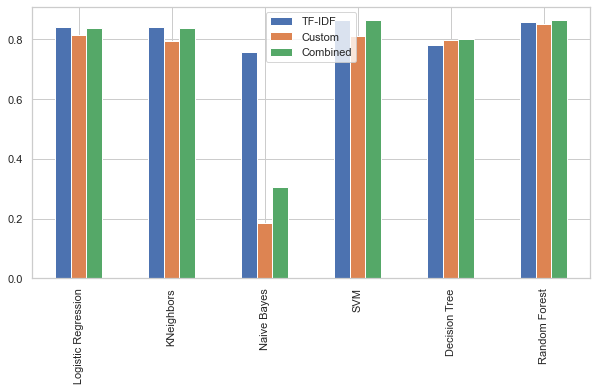

In [39]:
plt.figure(figsize=(10, 5))

acc_df.T.plot(kind='bar', figsize=(10, 5))